In [25]:
# 주성분 분석
# 고차원의 데이터는 시각화가 어려움
# 데이터의 분산을 최대한 유지하면서 저차원으로 데이터 변환 진행(여기서 언급한 데이터 분산은 )
# x,y 좌표를 가지고 있을 때 x 혹은 y 좌표를 버리는 것임
# 단 이런 식으로 했을 때 데이터가 중첩될 수 있으므로 중첩이 적어야하며 이런 케이스가 분산이 큰 경우임

In [26]:
# 로지스틱 회귀 & 소프트맥스
# 내일은 뉴럴 네트워크(NN)

# https://www.philgineer.com/2021/07/22-2.html
# 위 주소 참고하여 공식이 어떻게 되는지 볼 것
# ŷ(yhat햇)는 예측값, y는 실제값을 의미함
# sigmoid = 1/ 1+e^-(wx+b) 여기서 e는 자연상수임, wx+b 는 z로 표기하기도 함. 또한 z는 선형회귀임

# 선형회귀의 공식에서 제곱을 먹이면 포물선이 나옴
# 이와 다르게 로지스틱 회귀를 사용할 땐 시그모이드 형태의 상태에서 제곱을 하게 되며
# 결과는 포물선이 여러개 연결된 형태를 보이게 되며 이때 로컬, 글로벌 미니멈이 생기게 되어 문제가 됨
# https://yoon1seok.tistory.com/34 위내용은 옆의 링크에서 자세히 설명되어 있음
# 시그모이드를 이용해서 0.5 이상은 1, 미만은 0으로 되는데 1이 정답인데 예측이 0.3이면 0으로 예측하여 틀리게 됨
# 위와 같은 상황을 타개하려면? = w의 값을 바꿔주면 됨(or b를 바꾸거나)
# 그래서 로지스틱(H(x))은 0~1까지의 범위를 가지게 됨

# 이에 따라 로지스틱 회귀를 사용할 땐 로컬 미니멈에 빠질 수 있어 MSE를 사용하지 않음
# 시그모이드를 이용하여 로지스틱 회귀를 사용
# 이진 분류에 적합한 모델이 됨

# 그럼 이진 분류가 아닌 다중분류를 하고 싶다면 어떻게 하는가? 
# = 로지스틱 회귀를 여러개 붙여 정규화된 출력하는 소프트맥스를 사용
# 만드는 방법은 이진분류를 여러번 하게 됨. - A가 맞다/아니다, B가 맞다/아니다, C가 맞다/아니다, ...
# 이것을 해주는 것이 소프트맥스 함수가 처리하게 됨

# https://velog.io/@ym980118/%EB%94%A5%EB%9F%AC%EB%8B%9D-%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98-%EA%B0%84%EB%8B%A8-%EC%A0%95%EB%A6%AC-%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C-%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4-ReLU
# 쉽게 보는 활성화 함수 설명
# 사실 다중분류는 머신러닝, 딥러닝 통틀어서 소프트맥스를 사용함

In [27]:
# 앙상블 기법
# 여러가지의 모델을 결합하여 사용함
# 배깅, 부스팅이 있음

# 배깅: 샘플을 여러번 추출(부트스트랩) -> 모델을 생성 후 학습 -> 결과물을 집계
# 대표모델은 랜덤포레스트가 있음
# 진짜 어중간하거나 잘 모르겠으면 랜덤포레스트, svm을 이용하면 평타이상은 하게 됨

# 부트스트랩은 데이터 샘플링시 편향을 높여서 분산이 높은 모델의 과적합 위험을 줄이는 효과를 가져옴
# 적은 데이터를 학습하되 중복 데이터 학습을 허용하여 편향이 높은 데이터를 학습하며 샘플링 크기는 전체의 60%정도사용

# 하드 보팅(voting): 보팅의 의미에 맞게 투표를 통해 결정하며 최대 득표를 받은 예측값을 결론으로 사용
# 소프트보팅: 각 분류값별 확률을 합한 값을 점수로 사용해 최대 점수를 가진 분류값을 결론으로 도출

# 랜덤포레스트: 다수 결정 트리들을 배깅하여 예측을 실행하는 앙상블 기법
# 각 노드에 주어진 데이터를 샘플링하여 일부 데이터를 제외한 채 최적의 특징을 찾아 트리를 나눔
# 편향을 증가시켜 과적합 위험 감소하며 좋은 성능을 보임

# 의사결정트리는 모든 열을 사용하여 학습을 함
# 반면 랜덤 포레스트는 여러 특성중 일부를 사용하여 학습을 진행(물론 여러 모델을 이용하므로 각 모델별로 학습된 내용과 결과가 달라짐)

# 부스팅: 이전 분류기의 학습결과를 바탕으로 다음 분류기의 학습 데이터의 샘플 가중치를 조정하여 학습하는 방법
# 즉 보통 공부할 때 틀린 것을 위주로 공부하는 것과 같다고 볼 수 있음
# 대표적으로 XGBoost, AdaBoost, GradientBoost 등
# 배깅은 병렬학습을 하지만 부스팅은 순차적 학습을 진행함

# 가중 투표-하드보팅: 분류기 성능에 따라 가중치를 반영하여 투표 결과를 조정함
# 남성0.4, 남성0.5, 여성0.95 이렇게 나오면 확률이 높은 여성을 뽑는게 맞지만 비슷하다면?
# 그래서 하드보팅을 가중투표할 때 남자 0.4+0.5 , 여자 0.95로 봐서 여성이 채택됨

# 가중 투표-소프트보팅: 단일 예측값이 아닌 모든 분류값에 대한 확률에 가중치를 곱한 값으로 결론 도출
# 교재참고 필요. 예시로 분류기1,2,3, 남:여로 설명함
# 분1=0.7:0.3, 분2=0.8:0.2, 분3=0.1:0.9
# 남: 0.4*0.7 + 0.5*0.8 + 0.95*0.1 = 0.775
# 여: 0.4*0.3 + 0.5*0.2 + 0.95*0.9 = 1.075 이 숫자가 크므로 여자로 분류

# 스탠포드대학교의 강의자료 cs231n 이라는 교과목 코드를 검색하면 딥러닝 공부자료 찾을 수 있음

https://www.kaggle.com/code/imkushwaha/project-teen-market-segmentation-using-kmeans
위 주소를 참고하여 작업

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [29]:
data = pd.read_csv("snsdata.csv")
print(data.shape)
data.head() # 데이터의 수집목적은 소비시장에서 청소년들에 대한 마케팅을 위하여 수집됨

(30000, 40)


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [30]:
data.info() # 나이의 빈값은 어떻게 메꿀것인가? = 졸업연도에 따라 평균값을 추출하여 대입
data.describe() # 성별의 빈값을 어떻게 메꿀 것인가? = 졸업연도의 성비를 봐서 대입 or 워딩의 성별에 따라서 입력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


3살에 고졸...?

In [31]:
data.describe(include='object') # 문자열 기술통계

,gender
count,27276
unique,2
top,F
freq,22054


In [32]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [33]:
data.gender.value_counts(dropna=False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

# 임의로 작업 시작

In [34]:
def gender_to_numeric(x):
    if x=="F":
        return 1 # 여성이면 1
    elif x == 'M':
        return 2 # 남성이면 2
data['gender'] = data.gender.apply(gender_to_numeric)

In [35]:
# data.gender.fillna('not disclosed', inplace=True) # 연습문제1 : 적절한 값으로 nan을 대체하시오.

### 연도별 연령 평균 확인

In [36]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

### 연도별 평균연령으로 빈값 대체

In [37]:
# data['age'] = data.groupby('gradyear').transform(lambda x : x.fillna(x.mean()))
# 위는 잘못된 코드
data['age'].fillna(data.groupby('gradyear')['age'].transform('mean'), inplace=True)
# data['age'] = data.groupby('gradyear')['age'].fillna('mean') 잘못된 듯
# data['age'] = data.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean())) 강사님 코드 수정

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  float64
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

### 이상치 확인

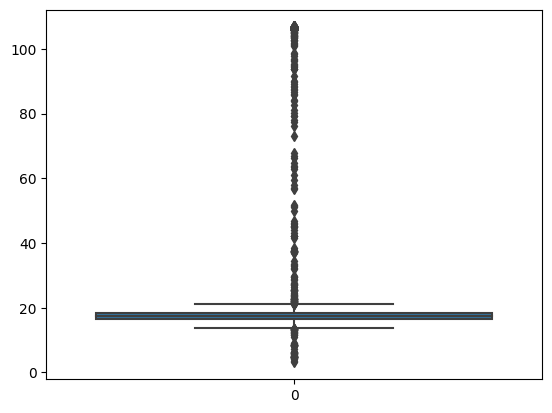

In [39]:
sns.boxplot(data['age'])
plt.show() # 이상치의 값이 너무 많음;;

In [40]:
q1 = data['age'].quantile(0.25) # 1사분위
q3 = data['age'].quantile(0.75) # 3사분위
iqr = q3-q1
iqr

1.8874592240696728

In [41]:
print(q3+iqr*1.5)
print(q1-iqr*1.5)
low = q1-iqr*1.5
high = q3+iqr*1.5

21.222648060174183
13.672811163895492


In [42]:
low = q1-iqr*1.5
high = q3+iqr*1.5
# 이상치 출력
data[(data.age>high) | (data.age<low)]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
34,2006,1.0,8.383,0,0,0,0,1,0,0,...,0,1,0,0,0,0,2,0,0,0
70,2006,NaN,106.686,24,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
78,2006,1.0,84.159,45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,2006,1.0,33.593,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,2006,1.0,86.136,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29809,2009,1.0,106.130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29850,2009,1.0,37.136,69,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29922,2009,1.0,106.864,44,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29940,2009,1.0,33.194,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#outliers 출력
# iqr*1.5+q3 초과, q1-iqr*1.5 미만

#이상치 : 367건
#data[(data['age'] > iqr*1.5+q3) | (data['age'] < q1-iqr*1.5)]

#정상치 : 29633 건
data[(data['age'] <= iqr*1.5+q3) & (data['age'] >= q1-iqr*1.5)].shape

(29633, 40)

In [44]:
df=data[(data['age'] <= iqr*1.5+q3) & (data['age'] >= q1-iqr*1.5)]
df.shape

(29633, 40)

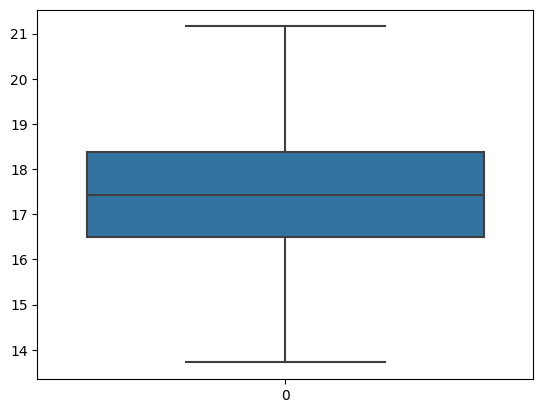

In [45]:
sns.boxplot(df["age"])
plt.show()

In [46]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,2.0,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1.0,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,2.0,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1.0,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [47]:
df.gender.value_counts(dropna=False)

1.0    21804
2.0     5138
NaN     2691
Name: gender, dtype: int64

In [49]:
df_mf = df[~df.gender.isnull()]
print(df_mf.gender.unique())
df_mf.head()

[2. 1.]


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,2.0,18.982000,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1.0,18.801000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,2.0,18.335000,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1.0,18.875000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,1.0,19.137241,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [50]:
target = df_mf.gender
df_nn = df_mf.drop('gender', axis=1)
df_nn.head()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,18.982000,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,18.801000,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,18.335000,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,18.875000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,19.137241,142,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [51]:
df_n = df[df.gender.isnull()].drop('gender', axis=1)
df_n

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
4,2006,18.995000,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
13,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2006,19.137241,135,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29905,2009,16.876025,45,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29928,2009,16.876025,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29931,2009,16.876025,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29970,2009,16.876025,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### KNN 적용

In [52]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(df_nn, target)
pred = clf.predict(df_n)

In [53]:
pred = pd.Series(pred)
pred.name = 'gender'
pred

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2686    1.0
2687    1.0
2688    1.0
2689    1.0
2690    1.0
Name: gender, Length: 2691, dtype: float64

In [54]:
df_n = pd.concat([df_n.reset_index(drop=True), pred], axis=1)
df_n

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender
0,2006,18.995000,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1.0
1,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,2006,19.137241,135,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,2009,16.876025,45,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.0
2687,2009,16.876025,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2688,2009,16.876025,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2689,2009,16.876025,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [55]:
df = pd.concat([df_mf.reset_index(drop=True), df_n]).reset_index(drop=True)
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,2.0,18.982000,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1.0,18.801000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,2.0,18.335000,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1.0,18.875000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,1.0,19.137241,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# 위까지 KNN 적용하여 성별 대체

In [69]:
scaled_feature = df.copy()
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [70]:
names=df.columns[4:40]
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [71]:
features=scaled_feature[names]
features

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29628,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.preprocessing import StandardScaler
features.values # 배열 출력

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
scaler = StandardScaler().fit(features.values)

In [74]:
features = scaler.transform(features.values)

In [75]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,2.0,18.982000,7,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
1,2006,1.0,18.801000,0,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,1.063874,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
2,2006,2.0,18.335000,69,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,2.020691,-0.220556,-0.177494
3,2006,1.0,18.875000,0,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
4,2006,1.0,19.137241,142,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,0.887997,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,2.280682,-0.177494


In [ ]:
# def gender_to_numeric(x):
#     if x=="M":
#         return 1
#     if x=="F":
#         return 2
#     if x== 'not disclosed':
#         return 3
    
# scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
# scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

In [ ]:
# scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [77]:
model = kmeans.fit(scaled_feature)

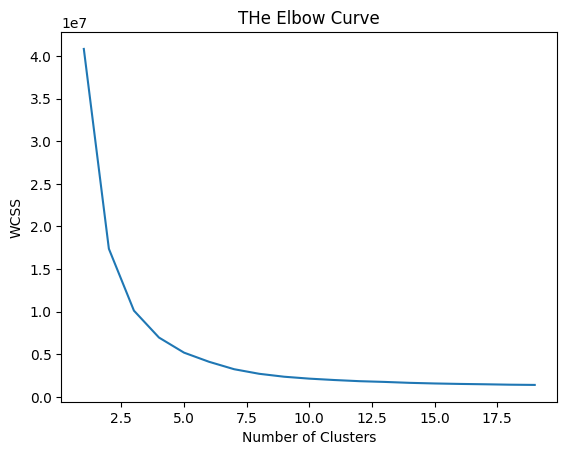

In [78]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()

그림을 봤을 때 4,5정도가 적절해보임

성별 처리 후에도 다소 비슷한 이미지를 보이는데 4정도가 적당하게 보임

In [79]:
# kmeans = KMeans(n_clusters=5)
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_feature)

KMeans(n_clusters=4)

In [81]:
df['cluster'] = kmeans.labels_
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,2.0,18.982000,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1.0,18.801000,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,2.0,18.335000,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,1.0,18.875000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,1.0,19.137241,142,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,3


In [82]:
df.cluster.value_counts()

0    16279
2     9133
1     3668
3      553
Name: cluster, dtype: int64

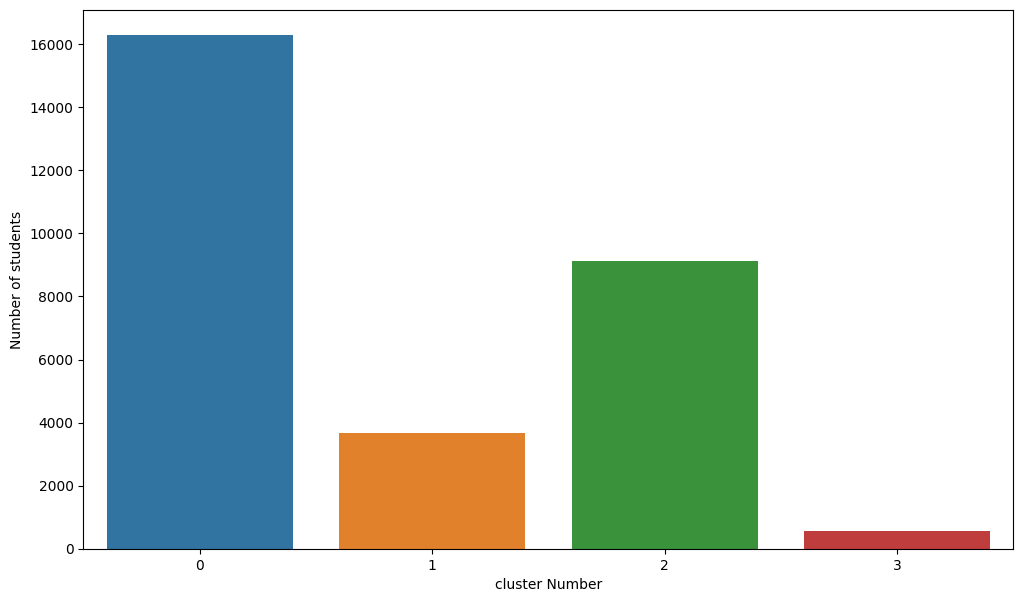

In [85]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,4,1), y=df.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

In [87]:
df.groupby(['cluster']).count()['age'].values

array([16279,  3668,  9133,   553], dtype=int64)

In [ ]:
scaled_feature.basketball.mean() # 0.0000...00054948..
# 모든 열은 0에 아주 근접하게 출력됨

5.4948638232114415e-17

In [ ]:
kmeans.cluster_centers_ # 각 클러스터별 40차원 열의 중심점 좌표 출력
#    drugs(기존 맨마지막 열)
# 0 -9.84131959e-03  -> -0.009
# 1 -6.53085230e-03  -> -0.006
# 2 1.05897240e-02   -> 0.01
# 3 3.50346467e-03   -> 0.003
# 4 -3.12736575e-02  -> -0.03

# 위의 값에서 가장 문제가 있는 집단은 어디일까? = 그나마 2가 언급횟수가 많음. 참고로 절댓값으로 보면됨

array([[ 2.00751362e+03,  1.89746876e+00,  1.78867221e+01,
         3.37193207e+01,  2.99903672e-02,  2.34269727e-02,
         2.49463967e-02,  2.14683178e-02,  4.33672180e-02,
         3.21480925e-02,  6.76800083e-03,  1.40248618e-02,
         1.36973021e-02,  3.07192895e-02,  2.58213754e-02,
         1.35360054e-02,  1.19186927e-02,  1.64158604e-02,
         8.33290858e-03,  3.67629335e-02,  3.54028275e-02,
         2.41304159e-02,  5.27615447e-02,  2.73797949e-02,
         1.57752504e-02,  2.04146523e-02,  1.68402808e-02,
         1.00497888e-02,  1.11389334e-02,  1.73524335e-02,
         1.04306073e-02,  1.09415037e-02,  3.16794014e-02,
         1.68565459e-02,  6.72604349e-03, -4.61272383e-03,
         1.50962876e-02,  2.89592788e-02,  3.66101473e-04,
        -9.84131959e-03],
       [ 2.00762254e+03,  1.95235914e+00,  1.78828608e+01,
         7.07171324e+01,  7.82236186e-02,  4.62596362e-02,
         5.35394050e-02,  9.97678280e-02,  5.51478259e-02,
         3.90802233e-02,  6.38

In [ ]:
#       'die',          'death',        'drunk',        'drugs'
# 1. 1.50962876e-02,  2.89592788e-02,  3.66101473e-04, -9.84131959e-03
# 2. -1.67904154e-02,  1.84881665e-02,  6.27674254e-03, -6.53085230e-03
# 3. -8.37730047e-03, -2.91481897e-02, -9.76119832e-03, 1.05897240e-02
# 4. 3.42342063e-02,  5.20915154e-02,  1.22819897e-01, 3.50346467e-03
# 5. 4.29429552e-02,  6.22861655e-02,  8.00945105e-02, -3.12736575e-02

In [ ]:
kmeans.cluster_centers_[4] # 1.9가 나옴;;

array([ 2.00769479e+03,  1.99586435e+00,  1.76881149e+01,  1.29670802e+02,
        1.50886744e-01,  5.74243499e-02,  1.86445679e-02,  1.34306678e-01,
        1.00754878e-01,  3.12151041e-02,  2.02760809e-01,  5.72893227e-02,
        1.82625407e-02, -2.14160287e-03,  1.95492532e-01,  1.68118337e-02,
        1.13200465e-01,  1.62168744e-01,  2.96067147e-02,  1.20932085e-01,
       -1.19891518e-02,  2.63507544e-03,  2.83732342e-02,  1.47086121e-02,
        1.20357356e-01,  1.53687303e-01,  6.75573772e-02,  4.12591467e-02,
        9.04897684e-02,  1.02770426e-01,  1.84776160e-02,  2.48281525e-01,
        2.03503483e-01,  3.40621018e-02,  1.96854677e-01,  1.57228204e-01,
        4.29429552e-02,  6.22861655e-02,  8.00945105e-02, -3.12736575e-02])

In [ ]:
data.columns # 여기서 4번째 열부터 보면되므로 basketball의 언급이 많다는 것을 알 수 있음

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs',
       'cluster'],
      dtype='object')

In [ ]:
# DBSCAN 진행 후 결과 해석